# 1. TorchAudio를 이용한 음성파일 처리

## Python Audio Manipulation Packages
### Torchaudio
<img src="https://github.com/pytorch/audio/raw/main/docs/source/_static/img/logo.png" height=120>

The aim of torchaudio is to apply PyTorch to the audio domain.



### Librosa

<img src="https://github.com/librosa/librosa/raw/main/docs/img/librosa_logo_text.svg" heigt=120>

A python package for music and audio analysis.



### library import
- `torch` : Deep learning 라이브러리, 간편하게 모델을 설계하고 학습 가능(PyTorch)
- `torchaudio` : torch tensor형식으로 오디오를 다룰 수 있는 라이브러리
- `pandas` : dataframe, csv, excel - table 데이터를 다루는 라이브러리
- `matplotlib` : 시각화용 라이브러리
- `IPython.display` : IPython 위젯을 사용할 수 있는 라이브러리
- `pathlib` : 경로 관련 라이브러리, 파일의 경로를 쉽게 사용가능


In [1]:
import torch
import torchaudio
import torchaudio.transforms as T
import torch.nn.functional as F

import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd
from pathlib import Path


## Version Check

In [2]:
print(torch.__version__)
print(torchaudio.__version__)

2.2.1+cu121
2.2.1+cu121


# Load Audio File
## Data : free-spoken-digit-dataset

음성 버전의 MNIST dataset

https://github.com/Jakobovski/free-spoken-digit-dataset

<img src="https://drive.google.com/uc?id=1yEjXMS5-KTrYriyPhrSaJqeneBTStao_">

### Current status
- 6 speakers
- 3,000 recordings (50 of each digit per speaker)
- English pronunciations
### Organization
Files are named in the following format: `{digitLabel}_{speakerName}_{index}.wav` Example: 7_jackson_32.wav

### Usage
The test set officially consists of the first 10% of the recordings. Recordings numbered 0-4 (inclusive) are in the test and 5-49 are in the training set.



In [3]:
!git clone https://github.com/Jakobovski/free-spoken-digit-dataset

Cloning into 'free-spoken-digit-dataset'...
remote: Enumerating objects: 4260, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 4260 (delta 25), reused 8 (delta 8), pack-reused 4212
Receiving objects: 100% (4260/4260), 30.38 MiB | 23.71 MiB/s, done.
Resolving deltas: 100% (129/129), done.


In [4]:
!ls

free-spoken-digit-dataset  sample_data


In [5]:
!ls free-spoken-digit-dataset

acquire_data  metadata.py	    README.md	upload_to_hub.py
__init__.py   pip_requirements.txt  recordings	utils


```
acquire_data  metadata.py	    README.md	upload_to_hub.py
__init__.py   pip_requirements.txt  recordings	utils
```

`recodingds` : 디렉토리에 음성 파일들이 위치

In [9]:
audio_dir = Path("./free-spoken-digit-dataset/recordings")
audios = list(audio_dir.rglob("*.wav"))
len(audios)

3000

In [10]:
audios[:10]

[PosixPath('free-spoken-digit-dataset/recordings/4_theo_7.wav'),
 PosixPath('free-spoken-digit-dataset/recordings/4_theo_21.wav'),
 PosixPath('free-spoken-digit-dataset/recordings/0_nicolas_31.wav'),
 PosixPath('free-spoken-digit-dataset/recordings/2_theo_18.wav'),
 PosixPath('free-spoken-digit-dataset/recordings/4_nicolas_48.wav'),
 PosixPath('free-spoken-digit-dataset/recordings/3_george_22.wav'),
 PosixPath('free-spoken-digit-dataset/recordings/8_nicolas_29.wav'),
 PosixPath('free-spoken-digit-dataset/recordings/3_george_24.wav'),
 PosixPath('free-spoken-digit-dataset/recordings/5_jackson_48.wav'),
 PosixPath('free-spoken-digit-dataset/recordings/5_lucas_32.wav')]

audio파일들의 Path를 확인

In [11]:
print(audios[0])
print(audios[0].name)
print(audios[0].stem)

free-spoken-digit-dataset/recordings/4_theo_7.wav
4_theo_7.wav
4_theo_7


## `ipd.Audio`를 이용한 `wav`파일 들어보기

```
??ipd.Audio
```

In [ ]:
??ipd.Audio

In [13]:
idx = 3
print(audios[idx])
ipd.Audio(str(audios[idx]))

free-spoken-digit-dataset/recordings/2_theo_18.wav


## Audio Meta data

- `sample_rate` is the sampling rate of the audio
- `num_channels` is the number of channels
- `num_frames` is the number of frames per channel
- `bits_per_sample` is bit depth
- `encoding` is the sample coding format

In [20]:
print(torchaudio.info(audios[1]))

AudioMetaData(sample_rate=8000, num_frames=3311, num_channels=1, bits_per_sample=16, encoding=PCM_S)


## torchaudio를 이용하여 음악파일 불러오기
### Loading audio data
To load audio data, you can use `torchaudio.load()`.

This function accepts a path-like object or file-like object as input.

The returned value is a tuple of waveform (`Tensor`) and sample rate (`int`).

By default, the resulting tensor object has `dtype=torch.float32` and its value range is` [-1.0, 1.0]`.

For the list of supported format, please refer to the torchaudio documentation.
```
waveform, sample_rate = torchaudio.load(SAMPLE_WAV)
```

In [ ]:
??torchaudio.load

In [15]:
print(audios[1])
y,sr = torchaudio.load(audios[1])

free-spoken-digit-dataset/recordings/4_theo_21.wav


In [16]:
sr #sampling rate

8000

In [17]:
y

tensor([[ 5.1880e-04, -9.7656e-04,  1.2207e-04,  ...,  1.2512e-03,
          9.1553e-05, -7.9346e-04]])

In [18]:
print(type(y))

<class 'torch.Tensor'>


In [19]:
y.shape, sr

(torch.Size([1, 3311]), 8000)

In [21]:
3311/8000

0.413875

In [22]:
y[0].shape

torch.Size([3311])

In [23]:
y.mean(dim=0).shape

torch.Size([3311])

In [ ]:
y[0,:10]

tensor([-0.0114, -0.0124, -0.0128, -0.0135, -0.0123, -0.0111, -0.0072, -0.0043,
        -0.0013,  0.0031])

마찬가지로 `ipd.Audio`를 이용해서도 `torch.Tensor`타입의 변수를 읽고 들을 수 있음.

In [ ]:
??ipd.Audio

In [24]:
ipd.Audio(y, rate=sr)

## torch.Tensor타입의 Waveform의 시각화
`matplotlib.pyplot` 을 이용하여 audio sample을 시각화 가능

python의 `Slicing`을 통해 특정구간을 확대하여 확인 가능


In [ ]:
data = list(torch.sin(torch.tensor(range(10))))
data

[tensor(0.),
 tensor(0.8415),
 tensor(0.9093),
 tensor(0.1411),
 tensor(-0.7568),
 tensor(-0.9589),
 tensor(-0.2794),
 tensor(0.6570),
 tensor(0.9894),
 tensor(0.4121)]

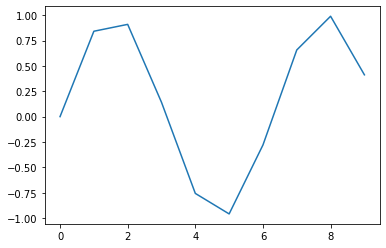

In [ ]:
plt.plot(data)

In [26]:
y[0]

tensor([ 5.1880e-04, -9.7656e-04,  1.2207e-04,  ...,  1.2512e-03,
         9.1553e-05, -7.9346e-04])

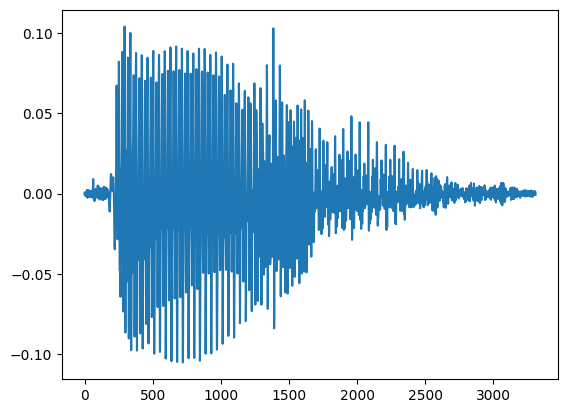

In [25]:
plt.plot(y[0])

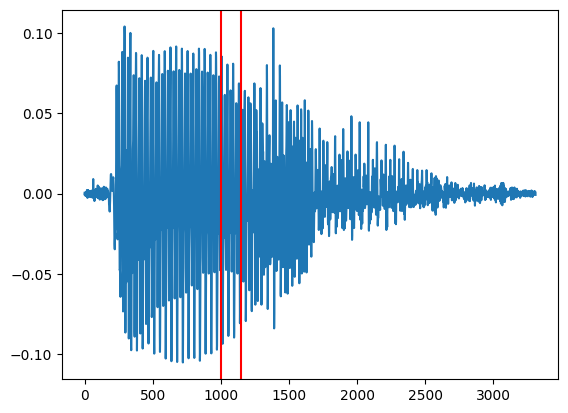

In [30]:
start,end = 1000,1150
plt.plot(y[0])
plt.axvline(start,color='r')
plt.axvline(end,color='r')

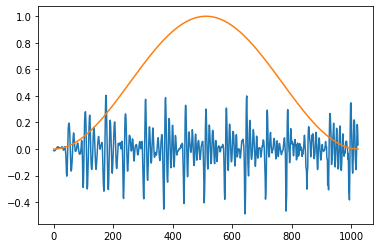

In [ ]:
plt.plot(y[0][0:1024])
plt.plot(torch.hann_window(1024))


In [ ]:
data = y[0][0:1024]*torch.hann_window(1024)

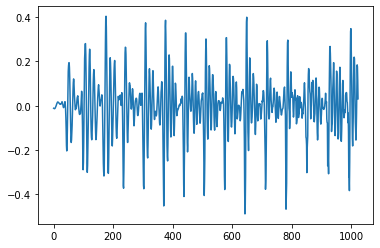

In [ ]:
plt.plot(y[0][0:1024])

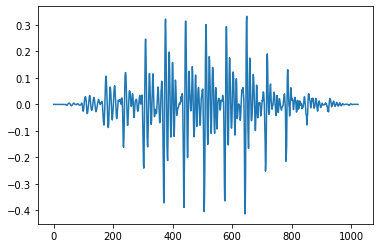

In [ ]:
plt.plot(data)

In [ ]:
torch.hann_window(1024)

tensor([0.0000e+00, 9.4175e-06, 3.7640e-05,  ..., 8.4698e-05, 3.7640e-05,
        9.4175e-06])

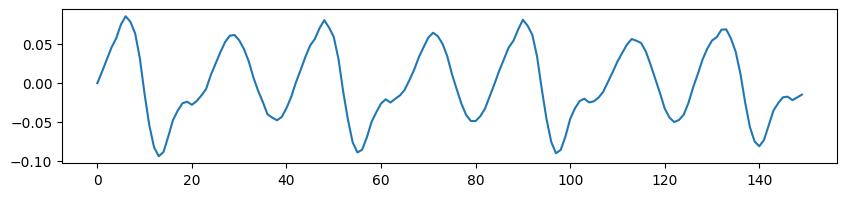

In [31]:
start,dur = 1000,150
#plt.bar(range(dur),y[0][start:start+dur])
plt.figure(figsize=(10,2),dpi=100)
plt.plot(range(dur),y[0][start:start+dur])
plt.show()

### `matplotlib.pyplot.stem` 을 이용하여 sample확인
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.stem.html
```python
??matplotlib.pyplot.stem
```

<ipython-input-32-174b1b9c6973>:2: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(dur),y[0][start:start+dur], use_line_collection=True)


<StemContainer object of 3 artists>

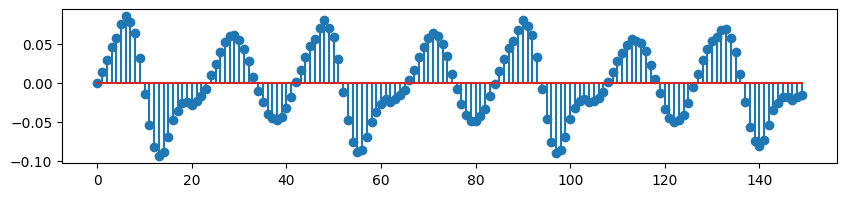

In [32]:
plt.figure(figsize=(10,2),dpi=100)
plt.stem(range(dur),y[0][start:start+dur], use_line_collection=True)

plot과 함께 그리기

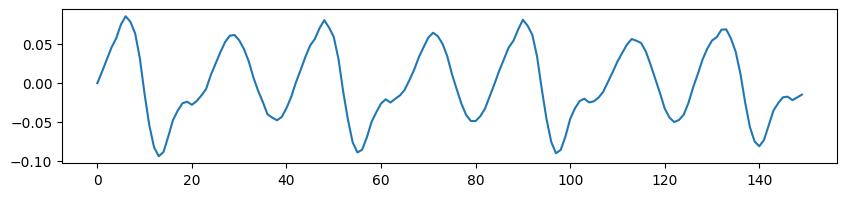

<ipython-input-33-02be7bae8a14>:7: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(dur),y[0][start:start+dur], use_line_collection=True)


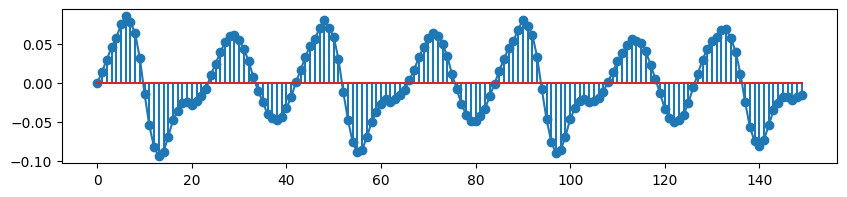

In [33]:
#plt.bar(range(dur),y[0][start:start+dur])
plt.figure(figsize=(10,2),dpi=100)
plt.plot(range(dur),y[0][start:start+dur])
plt.show()
plt.figure(figsize=(10,2),dpi=100)
plt.plot(range(dur),y[0][start:start+dur])
plt.stem(range(dur),y[0][start:start+dur], use_line_collection=True)
plt.show()

## Audio feature extraction
### Overview of audio features

<img src="https://download.pytorch.org/torchaudio/tutorial-assets/torchaudio_feature_extractions.png" width=600>



frequncy Domain

STFT (DFT)

<img src="https://upload.wikimedia.org/wikipedia/commons/6/61/FFT-Time-Frequency-View.png?20171130134719" width=600>

<img src="https://kr.mathworks.com/help/dsp/ref/stft_output.png" width=600>

### Raw Spectrogram
`torchaudio.transforms.Spectrogram` class를 이용 `T.Spectrogram`
```python
n_fft = 1024
win_length = None
hop_length = 512

# Define transform
spectrogram = T.Spectrogram(
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
)
```

In [ ]:
??T.Spectrogram

free-spoken-digit-dataset/recordings/4_theo_21.wav
torch.Size([1, 3311])


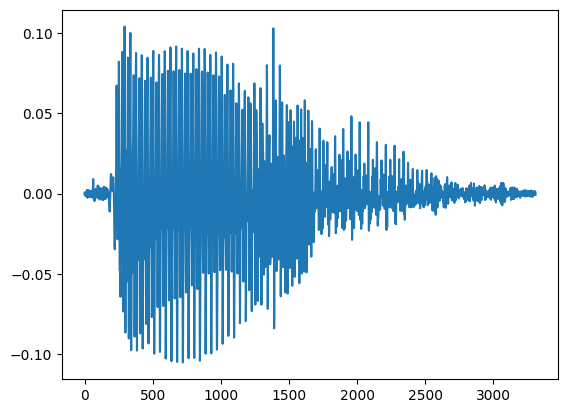

In [34]:
print(audios[1])
y,sr = torchaudio.load(audios[1])
print(y.shape)
plt.plot(y[0])


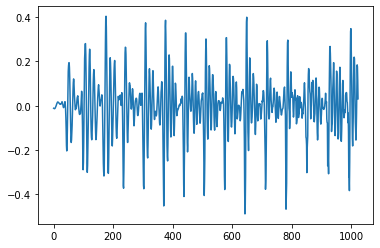

In [ ]:
plt.plot(y[0][0:1024])

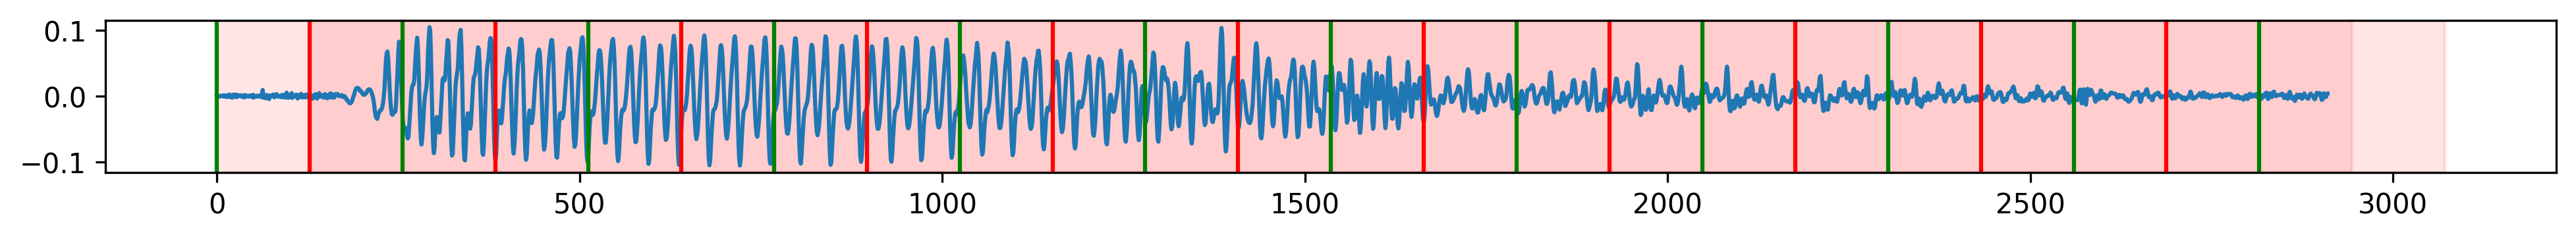

In [35]:
n_fft=256
win_length = n_fft
hop_length=win_length//2
start,dur = 0,2911
plt.figure(figsize=(16,1),dpi=300)
plt.plot(y[0][start:start+dur])
i=0

for x in range(start,dur,hop_length):
  i+=1
  c='r' if i%2==0 else 'g'
  plt.axvline(x,color=c)
  plt.axvspan(x,x+win_length,color='r',alpha=0.1)


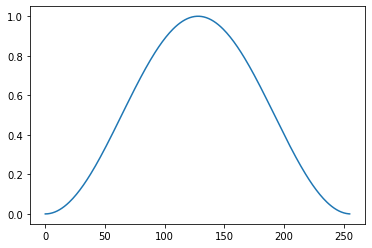

In [ ]:
 plt.plot(torch.hann_window(256)) #1/2 overlap 128

In [36]:
spec_converter = T.Spectrogram(n_fft=n_fft,
                               win_length=win_length,
                               hop_length=hop_length)
spec = spec_converter(y)

In [38]:
spec.shape

torch.Size([1, 129, 26])

`torch.Size([1, 129, 23])`

1 : batch size or channel

129 : n_fft // 2 +1 (n_fft = 256)

23 : ceil(len(y) /hop_length)


In [39]:
import math
print(len(y[0]) )
print(len(y[0])/hop_length )
print(math.ceil(len(y[0])/hop_length))


3311
25.8671875
26


In [ ]:
??T.Spectrogram

In [ ]:
print(len(y[0]))
print(len(y[0])//hop_length+1)

3187
25


In [40]:
spec, spec.shape

(tensor([[[6.1190e-05, 2.5956e-05, 3.3217e-04,  ..., 1.7921e-05,
           9.3613e-12, 2.0669e-05],
          [5.5039e-06, 1.3799e-06, 3.9358e-04,  ..., 2.1780e-05,
           3.7236e-05, 9.3432e-05],
          [1.7352e-05, 8.5950e-06, 8.2087e-05,  ..., 2.1515e-04,
           3.3276e-05, 2.1249e-04],
          ...,
          [1.0811e-07, 1.3963e-06, 6.7308e-06,  ..., 4.4080e-06,
           2.5153e-06, 4.1273e-06],
          [9.0875e-07, 3.7774e-07, 1.9499e-06,  ..., 9.6954e-07,
           8.4981e-07, 2.4367e-07],
          [5.3000e-07, 1.5906e-06, 1.1860e-08,  ..., 1.8524e-06,
           1.6061e-06, 1.8320e-06]]]),
 torch.Size([1, 129, 26]))

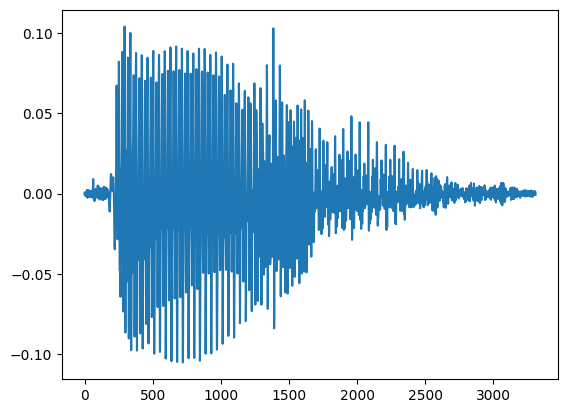

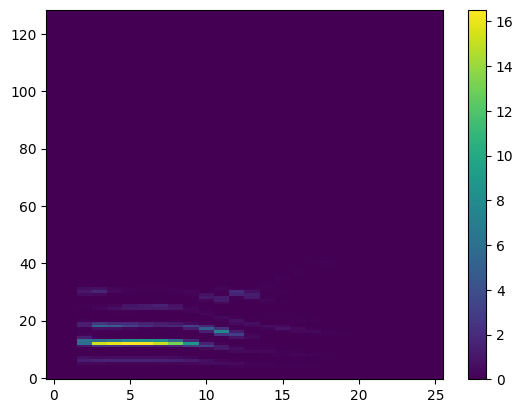

In [41]:
plt.plot(y[0])
plt.show()
plt.imshow(spec[0],origin="lower",aspect='auto',interpolation='nearest')
plt.colorbar()

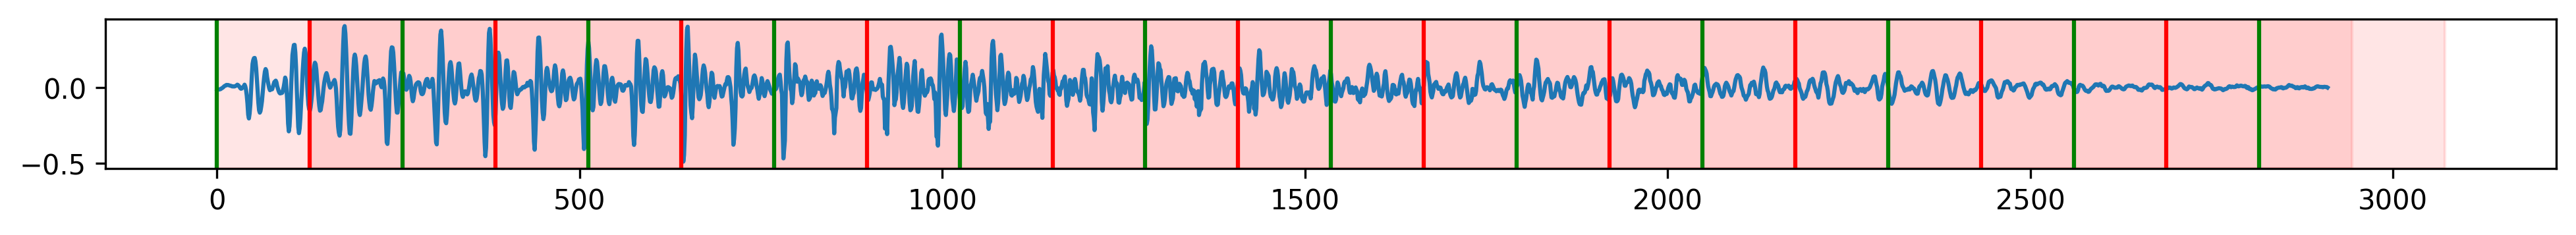

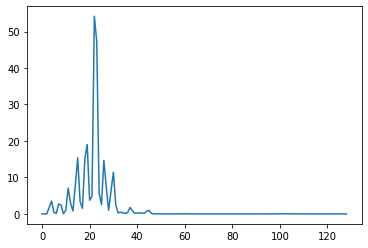

In [ ]:
n_fft=256
win_length = n_fft
hop_length=win_length//2
start,dur = 0,2911
plt.figure(figsize=(16,1),dpi=300)
plt.plot(y[0][start:start+dur])
i=0

for x in range(start,dur,hop_length):
  i+=1
  c='r' if i%2==0 else 'g'
  plt.axvline(x,color=c)
  plt.axvspan(x,x+win_length,color='r',alpha=0.1)
plt.show()
plt.plot(spec[0,:,5])
plt.show()

### AmplitudeToDB
Turn a tensor from the power/amplitude scale to the decibel scale.

`torchaudio.transforms.AmplitudeToDB(stype: str = 'power', top_db: Optional[float] = None)`
  

In [43]:
db_converter = T.AmplitudeToDB()

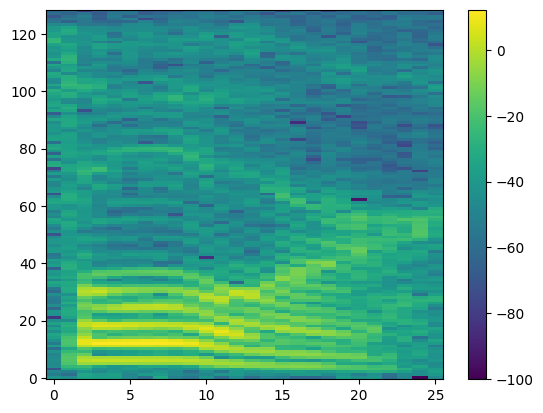

In [44]:
db_spec = db_converter(spec)
plt.imshow(db_spec[0],origin='lower',aspect='auto',interpolation='nearest')
plt.colorbar()

8000 sampling rate -> 4000 hz

129 bins

4000/129

In [ ]:
torch.arange(129)/129

tensor([0.0000, 0.0078, 0.0155, 0.0233, 0.0310, 0.0388, 0.0465, 0.0543, 0.0620,
        0.0698, 0.0775, 0.0853, 0.0930, 0.1008, 0.1085, 0.1163, 0.1240, 0.1318,
        0.1395, 0.1473, 0.1550, 0.1628, 0.1705, 0.1783, 0.1860, 0.1938, 0.2016,
        0.2093, 0.2171, 0.2248, 0.2326, 0.2403, 0.2481, 0.2558, 0.2636, 0.2713,
        0.2791, 0.2868, 0.2946, 0.3023, 0.3101, 0.3178, 0.3256, 0.3333, 0.3411,
        0.3488, 0.3566, 0.3643, 0.3721, 0.3798, 0.3876, 0.3953, 0.4031, 0.4109,
        0.4186, 0.4264, 0.4341, 0.4419, 0.4496, 0.4574, 0.4651, 0.4729, 0.4806,
        0.4884, 0.4961, 0.5039, 0.5116, 0.5194, 0.5271, 0.5349, 0.5426, 0.5504,
        0.5581, 0.5659, 0.5736, 0.5814, 0.5891, 0.5969, 0.6047, 0.6124, 0.6202,
        0.6279, 0.6357, 0.6434, 0.6512, 0.6589, 0.6667, 0.6744, 0.6822, 0.6899,
        0.6977, 0.7054, 0.7132, 0.7209, 0.7287, 0.7364, 0.7442, 0.7519, 0.7597,
        0.7674, 0.7752, 0.7829, 0.7907, 0.7984, 0.8062, 0.8140, 0.8217, 0.8295,
        0.8372, 0.8450, 0.8527, 0.8605, 

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140.]), <a list of 9 Text major ticklabel objects>)
<function yticks at 0x7fc832df8a60>


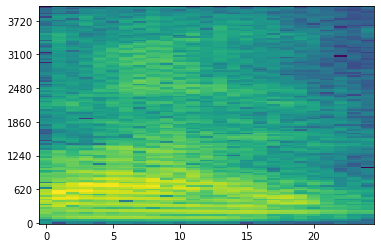

In [ ]:
db_spec = db_converter(spec)
plt.imshow(db_spec[0],origin='lower',aspect='auto',interpolation='nearest')
ax = plt.gca()
print(plt.yticks())
prev_yticks = plt.yticks()[0][1:-1]
yticks_label = [int(hz/129 * 4000) for hz in prev_yticks]
plt.yticks(ticks = prev_yticks, labels = yticks_label)
print(plt.yticks)
plt.show()

In [ ]:
spec.shape

torch.Size([1, 129, 25])

### Mel-Spectrogram
참고 : https://haythamfayek.com/2016/04/21/speech-processing-for-machine-learning.html

In [45]:
mel_scale = T.MelScale(n_mels=64,sample_rate=8000,f_min=20,f_max=4000,n_stft=129)

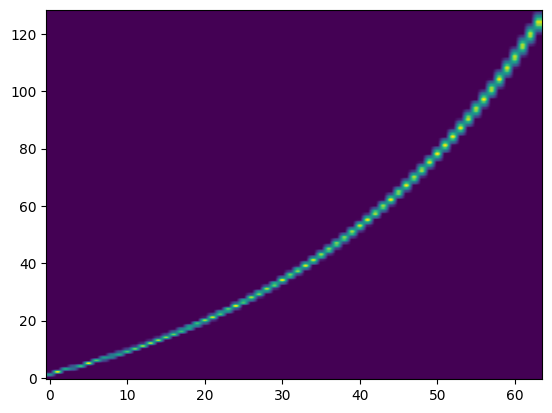

In [46]:
plt.imshow(mel_scale.fb,aspect='auto',origin='lower')

In [ ]:
fb = torchaudio.functional.melscale_fbanks(n_freqs=129,
                                           f_min=20,
                                           f_max=4000,
                                           n_mels=10,
                                           sample_rate=8000)
fb.shape

torch.Size([129, 10])

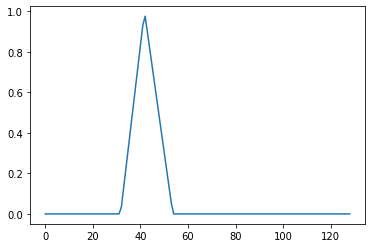

In [ ]:
  plt.plot(fb.T[5])

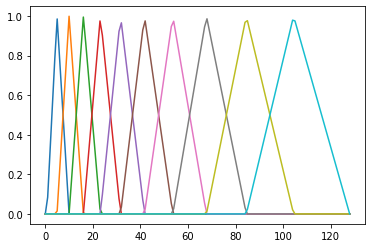

In [ ]:

for e,bin in enumerate(fb.T) :
  plt.plot(bin)
plt.show()

In [47]:
mel_converter = T.MelSpectrogram(sample_rate=8000,n_mels=64,n_fft=256,hop_length=n_fft//2)

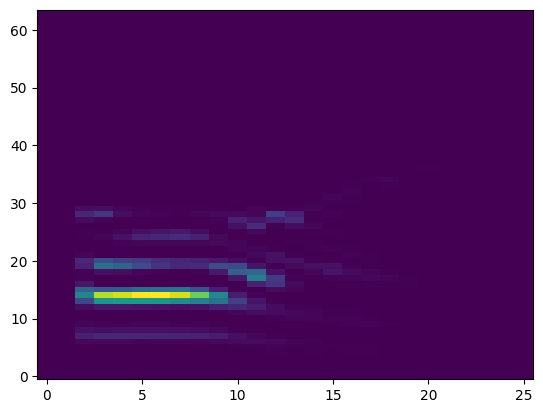

In [48]:
mel_spec = mel_converter(y)
plt.imshow(mel_spec[0],aspect='auto',interpolation='nearest',origin='lower')

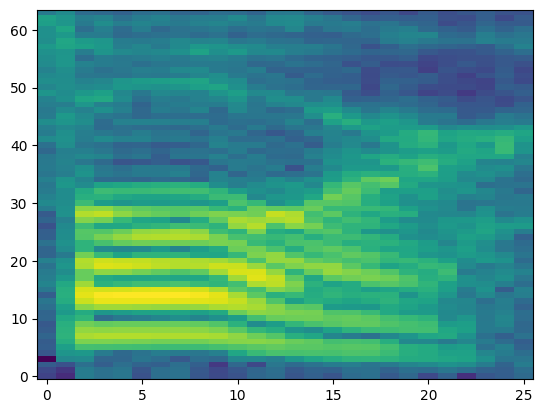

In [49]:
mel_spec = db_converter(mel_spec)
plt.imshow(mel_spec[0],aspect='auto',interpolation='nearest',origin='lower')

# MFCC
```python
CLASS torchaudio.transforms.MFCC(
        sample_rate: int = 16000,
        n_mfcc: int = 40,
        dct_type: int = 2,
        norm: str = 'ortho',
        log_mels: bool = False,
        melkwargs: Optional[dict] = None)
```

In [ ]:
??T.MFCC

In [50]:
melkwargs={
        "n_fft":256,
        "n_mels": 64,
        "hop_length": 256//2,
        "mel_scale": "htk",
    }
mfcc_converter = T.MFCC(sample_rate=8000,n_mfcc=13,melkwargs=melkwargs)

In [51]:
mfcc = mfcc_converter(y)
mfcc.shape

torch.Size([1, 13, 26])

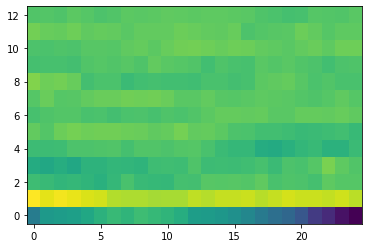

In [ ]:
#mfcc = db_converter(mfcc)
plt.imshow(mfcc[0],origin='lower',aspect='auto',interpolation='nearest')